In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the Titanic dataset from Seaborn
df = sns.load_dataset("titanic")


In [7]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
# Check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
# Fill missing age values with median
df['age']=df['age'].fillna(df['age'].median())

In [19]:
# Fill missing embark_town values with the most frequent value
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [21]:
# Drop 'deck' column since it has too many missing values
df.drop(columns=['deck'], inplace=True)

In [23]:
# Verify missing values again
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [25]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Boxplot for Age')

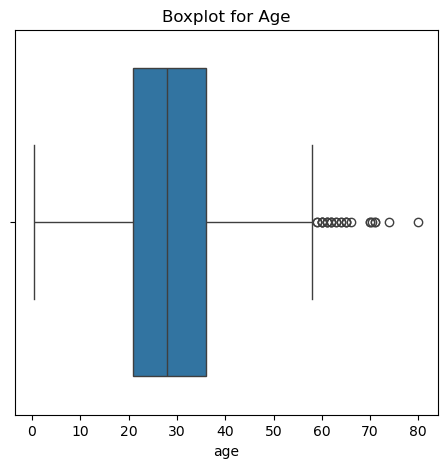

In [27]:
# Boxplot to check outliers in 'age' and 'fare'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['age'])
plt.title("Boxplot for Age")

Text(0.5, 1.0, 'Boxplot for Fare')

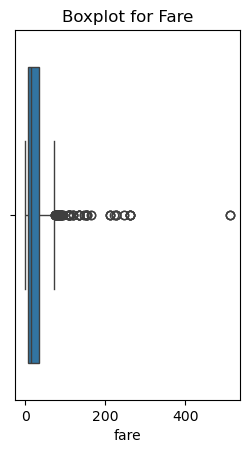

In [29]:
plt.subplot(1,2,2)
sns.boxplot(x=df['fare'])
plt.title("Boxplot for Fare")

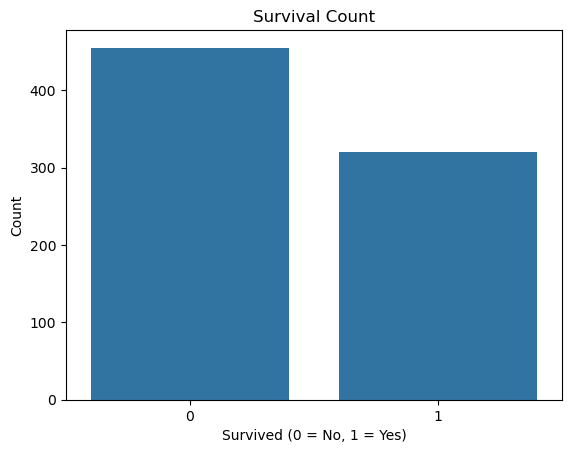

In [33]:
#Bar Chart for Categorical Variables (Survived Count)
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

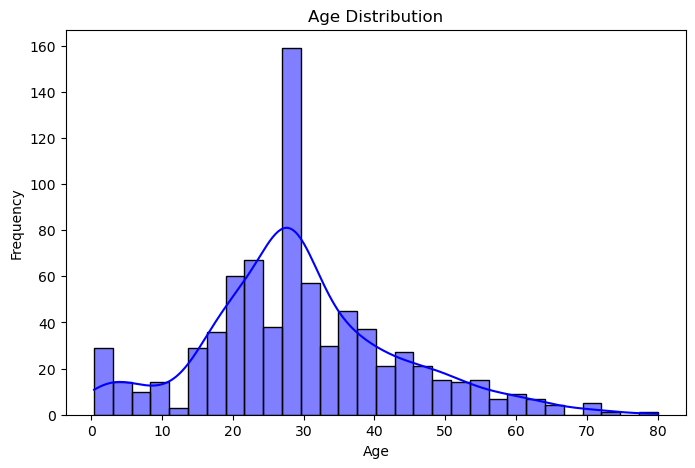

In [37]:
#Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

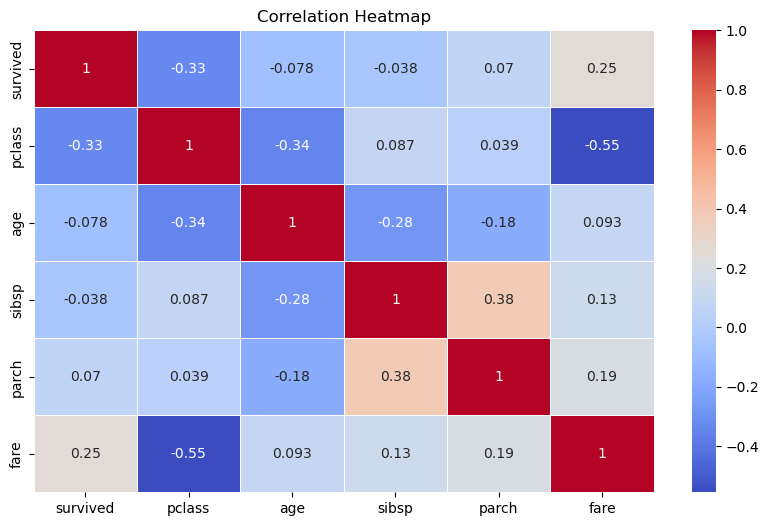

In [43]:
# Convert categorical variables into numerical format
df_numeric = df.select_dtypes(include=[np.number])  # Selecting only numeric columns

# Generate the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [45]:
# Print basic insights
print("Observations:")
print("- The survival rate is lower than the non-survival rate.")
print("- Age has some outliers but follows a normal distribution.")
print("- There is a strong correlation between Pclass and Fare.")
print("- Gender seems to play an important role in survival.")

Observations:
- The survival rate is lower than the non-survival rate.
- Age has some outliers but follows a normal distribution.
- There is a strong correlation between Pclass and Fare.
- Gender seems to play an important role in survival.
